In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from MLCode.KCrossVal import kFoldCross
from MLCode.utils import load_shuffled_cup, np_cup_TR, plot_NN_TR_VAL
import torch
from torch import nn
import itertools
from MLCode.SVM import load_results, save_results
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import time

In [2]:
df = load_shuffled_cup()
X_dev, Y_dev = np_cup_TR(df, test=False)

In [167]:
kernel='rbf'
C_list=[0.1,1,10,100,1000]
gamma_list=[0.0001,0.001,0.01,0.1,1]
epsilon_list=[0.001]
HP_list = itertools.product(gamma_list, C_list, epsilon_list)
results = []
for HyperParam in HP_list:
    gamma_s, C_s, epsilon_s = HyperParam

    SVR_model=SVR(kernel=kernel,gamma=gamma_s,C=C_s,epsilon=epsilon_s,cache_size=1200)
    mor=MultiOutputRegressor(SVR_model, n_jobs=2)

    res = kFoldCross(mor.fit, mor.predict, X_dev, Y_dev, 5)
    res = C_s, epsilon_s, gamma_s, res[0], res[1], res[3]
    results.append(res)

columns=['C', 'epsilon', 'gamma', 'MEE_mean', 'MEE_std', 'seconds']
df = pd.DataFrame(results, columns=columns)

# save results
save_results(df, kernel)
# load all saved results
df = load_results(kernel)

In [168]:
# load all saved results
df = load_results(kernel)
df.sort_values(by=['MEE_mean']).head()

,C,epsilon,gamma,MEE_mean,MEE_std,seconds
17,10.0,0.001,0.10,2.958995,0.171739,0.121038
18,100.0,0.001,0.10,3.123882,0.167362,0.128947
16,1.0,0.001,0.10,3.206170,0.181968,0.119483
14,1000.0,0.001,0.01,3.233564,0.146512,0.123410
13,100.0,0.001,0.01,3.353219,0.122090,0.113116


Epsilon:
0.001


,0.0001,0.0010,0.0100,0.1000,1.0000
0.1,16.749785,15.635549,9.648565,5.633035,15.372620
1.0,15.612316,9.095410,4.809139,3.206170,8.392088
10.0,9.053809,5.433131,3.698070,2.958995,5.008156
100.0,5.527399,4.644068,3.353219,3.123882,4.947466
1000.0,5.170011,3.849089,3.233564,3.800438,4.947466


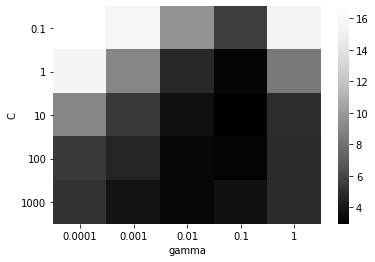

In [169]:
df2 = df
df2 = df2.sort_values(by=['C', 'gamma'])
array = df2['MEE_mean'].to_numpy()
array = array.reshape(-1, 5)
ax = sns.heatmap(array, xticklabels=gamma_list, yticklabels=C_list,cmap='Greys_r')
plt.yticks(rotation=0)
ax.set_xlabel('gamma')
ax.set_ylabel('C')

print('Epsilon:')
print(epsilon_list[0])
pd.DataFrame(array, index=C_list, columns=gamma_list)

In [5]:
kernel='rbf'
C_list=np.linspace(1, 100, 20)
gamma_list=[0.1]
epsilon_list=[0.001]
HP_list = itertools.product(gamma_list, C_list, epsilon_list)
results = []
for HyperParam in HP_list:
    gamma_s, C_s, epsilon_s = HyperParam

    SVR_model=SVR(kernel=kernel,gamma=gamma_s,C=C_s,epsilon=epsilon_s,cache_size=1200)
    mor=MultiOutputRegressor(SVR_model, n_jobs=2)

    res = kFoldCross(mor.fit, mor.predict, X_dev, Y_dev, 5)
    res = C_s, epsilon_s, gamma_s, res[0], res[1], res[2], res[3]
    results.append(res)

columns=['C', 'epsilon', 'gamma', 'MEE_Val_mean', 'MEE_Val_std', 'MEE_Tr_mean','seconds']
df = pd.DataFrame(results, columns=columns)

,C,epsilon,gamma,MEE_Val_mean,MEE_Val_std,MEE_Tr_mean,seconds
2,11.421053,0.001,0.1,2.957431,0.169936,2.425157,0.25822


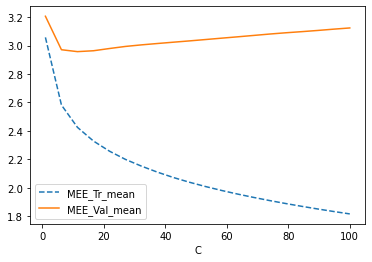

In [6]:
ax = df.plot(x='C', y='MEE_Tr_mean', linestyle='--')
df.plot(ax=ax,x='C', y='MEE_Val_mean')
df.sort_values(by=['MEE_Val_mean']).head(1)

In [109]:
kernel='poly'
C_list=[0.1,0.5,1,5]
epsilon_list = [0.01]
# epsilon_list=[0.001,0.1,10]
coeff_list=[0.5,1.0,1.5]
degree_list = [3,4,5]
HP_list = itertools.product(C_list, epsilon_list, degree_list, coeff_list)
results = []
for HyperParam in HP_list:
    C, epsilon, degree, coeff = HyperParam

    SVR_model=SVR(
        kernel='poly',degree=degree,coef0=coeff,C=C,epsilon=epsilon,cache_size=1200
    )
    mor=MultiOutputRegressor(SVR_model, n_jobs=2)

    start = time.time()
    res = kFoldCross(mor.fit, mor.predict, X_dev, Y_dev, 5)
    res = C, epsilon, degree, coeff, res[0], res[1], time.time()-start
    results.append(res)

columns=['C', 'epsilon', 'degree', 'coeff', 'MEE_mean', 'MEE_std', 'seconds']
df = pd.DataFrame(results, columns=columns)

# save results
save_results(df, kernel)


In [134]:
# load all saved results
df = load_results(kernel)
df.sort_values(by=['MEE_mean'])

,C,epsilon,degree,coeff,MEE_mean,MEE_std,seconds
52,0.5,1.00,5,1.0,3.068993,0.137332,0.567762
53,0.5,1.00,5,1.5,3.072654,0.147021,0.845697
61,1.0,1.00,5,1.0,3.082913,0.142093,0.762224
58,1.0,1.00,4,1.0,3.087110,0.141075,0.519133
59,1.0,1.00,4,1.5,3.094794,0.143163,0.677192
...,...,...,...,...,...,...,...
36,0.1,1.00,3,0.5,4.340061,0.130621,0.963546
14,0.1,0.01,4,0.5,4.635616,0.162282,0.489990
39,0.1,1.00,4,0.5,4.656652,0.146952,0.396238
16,0.1,0.01,5,0.5,4.690399,0.151578,0.511015


Epsilon: 0.01


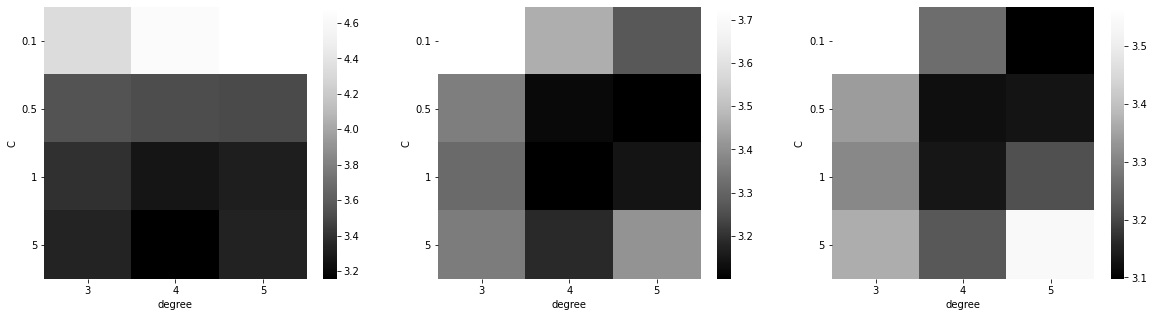

In [152]:
# load all saved results
df = load_results(kernel)
df = df.loc[df['epsilon'] == 0.01]

fig, axes = plt.subplots(1,3,figsize=(20,5))

print('Epsilon: 0.01')

for i, coeff in enumerate(coeff_list):
    df2 = df.loc[df['coeff'] == coeff]
    df2 = df2.sort_values(by=['C', 'degree'])
    array = df2['MEE_mean'].to_numpy()
    array = array.reshape(-1, 3)

    sns.heatmap(array, xticklabels=degree_list, yticklabels=C_list,cmap='Greys_r', ax=axes[i])
    axes[i].tick_params(labelrotation=0)
    axes[i].set_xlabel('degree')
    axes[i].set_ylabel('C')



In [4]:
kernel='sigmoid'
C_list=[0.0001,0.001,0.01,0.1]
epsilon_list=[0.001]
gamma_list=[0.001,0.01,1,10]
coeff_list=[1.0]
HP_list = itertools.product(C_list, epsilon_list, gamma_list, coeff_list)
results = []
for HyperParam in HP_list:
    C, epsilon, gamma, coeff = HyperParam

    SVR_model=SVR(kernel=kernel,gamma=gamma,C=C,epsilon=epsilon,coef0=coeff,cache_size=1200)
    mor=MultiOutputRegressor(SVR_model, n_jobs=2)

    start = time.time()
    res = kFoldCross(mor.fit, mor.predict, X_dev, Y_dev, 5)
    res = C, epsilon, gamma, coeff, res[0], res[1], time.time()-start
    results.append(res)

columns=['C', 'epsilon', 'gamma', 'coeff', 'MEE_mean', 'MEE_std', 'seconds']
df = pd.DataFrame(results, columns=columns)
# save results
save_results(df, kernel)

In [9]:
# load all saved results
df = load_results(kernel)
df.sort_values(by=['MEE_mean']).head()

,C,epsilon,coeff,MEE_mean,MEE_std,seconds,gamma
11,0.010,0.001,1.0,11.377398,0.538161,0.598023,10.00
10,0.010,0.001,1.0,11.574294,0.535328,0.826252,1.00
13,0.100,0.001,1.0,14.290641,0.578922,0.846445,0.01
7,0.001,0.001,1.0,15.984660,0.635743,0.616300,10.00
6,0.001,0.001,1.0,16.001757,0.634296,0.849892,1.00
